In [2]:
from pathlib import Path
import numpy as np

_sample_path = Path('/home/vin/Projects/medhok/data/features/mel_spectrogram/Solo/Endang11B-mel_spectrogram-373.npy')
_sample = np.load(_sample_path)

In [3]:
_sample

array([[-0.49999088, -0.5244022 , -0.53720325, ...,  0.        ,
         0.        ,  0.        ],
       [-0.45685235, -0.5238531 , -0.53720295, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4684028 , -0.52401894, -0.5372014 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.5293031 , -0.5247751 , -0.53720343, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5293114 , -0.5247752 , -0.53720343, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5293122 , -0.5247752 , -0.53720343, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [49]:
SAMPLE_RATE = 16000
FRAME_SIZE_SECOND = 0.025
FRAME_STRIDE_SECOND = 0.01
FRAME_SIZE = int(SAMPLE_RATE * FRAME_SIZE_SECOND)
FRAME_STRIDE = int(SAMPLE_RATE * FRAME_SIZE_SECOND)

def trim_silence(wave, feature=None):
    if feature is not None:
        frame_length = FRAME_SIZE
        hop_length = FRAME_STRIDE
    else:
        frame_length = 1
        hop_length = 1
    _rms = librosa.feature.rms(wave, hop_length=hop_length, frame_length=frame_length)
    _threshold = np.mean(_rms) / 2 * 1.04   # formula from Shon et al. (2018)
    _mask = np.nonzero(_rms > _threshold)[1]
    if feature is not None:
        return wave[:, _mask]
    return wave[_mask]

In [50]:
import librosa

_sample_wav = Path('/home/vin/Projects/medhok/data/audio/Ngadas/Marsam.wav')
_ = librosa.load(str(_sample_wav), sr=16000, mono=True, res_type='soxr_vhq')[0]
_ = np.append(_[0], _[1:] - 0.97 * _[:-1])
_ = trim_silence(_, feature=None)

In [51]:
_.shape

(29722028,)

In [42]:
_problem = _[29680000:29760000]

In [43]:
_mel_spectrogram = librosa.feature.melspectrogram(_problem, sr=16000, n_fft=400, hop_length=160)

In [44]:
_mel_spectrogram.shape

(128, 263)

In [45]:
np.isnan(_mel_spectrogram).any()

False

In [36]:
_mel_spectrogram

array([[ 4.126166  ,  2.8772466 , -0.3299197 , ..., -0.11799483,
         1.3848125 ,  1.0457368 ],
       [10.371265  ,  7.6163864 , -0.29949903, ...,  0.08967883,
         3.763087  ,  2.9005618 ],
       [-0.13475733,  0.4574439 ,  5.1863236 , ...,  0.7366345 ,
         3.3030944 ,  1.0885375 ],
       ...,
       [-0.16137752, -0.37090755, -0.34760842, ..., -0.25823286,
        -0.24736647, -0.22619292],
       [-0.16232505, -0.3757172 , -0.34968302, ..., -0.258457  ,
        -0.24735852, -0.22648749],
       [-0.16253728, -0.37724942, -0.35068417, ..., -0.26043382,
        -0.24833672, -0.22799133]], dtype=float32)

In [32]:
def CMVN(
    feats: np.ndarray,
    mean_var=True
) -> np.ndarray:
    """
    Normalises features.
    :param feats: features to normalise
    :param mean_var: whether to normalise with respect to the mean and variance
    :return: normalised features
    # """
    # feats_new = feats.copy()
    for i in range(feats.shape[1]):
        feats[:, i] = feats[:, i] - np.mean(feats[:, i])
        if mean_var:
            feats[:, i] /= np.std(feats[:, i])

    return feats

In [33]:
_mel_spectrogram_norm = CMVN(_mel_spectrogram, mean_var=True)

In [34]:
np.isnan(_mel_spectrogram_norm)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [35]:
np.isnan(_mel_spectrogram_norm).any()

False

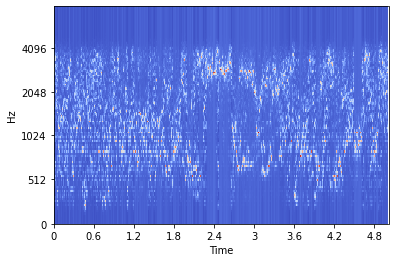

In [5]:
import librosa
from librosa import display
from matplotlib import pyplot as plt

SAMPLE_RATE = 16000
# Window Properties
FRAME_SIZE_SECOND = 0.025  # seconds
FRAME_STRIDE_SECOND = 0.01     # stride
FRAME_SIZE = int(SAMPLE_RATE * FRAME_SIZE_SECOND)   # for n_fft
FRAME_STRIDE = int(SAMPLE_RATE * FRAME_STRIDE_SECOND)   # for hop_length

display.specshow(_sample, sr=SAMPLE_RATE, hop_length=FRAME_STRIDE, x_axis='time', y_axis='mel')
plt.show()

In [8]:
_sample.shape

(128, 501)

In [6]:
_sample_mfcc_path = Path('/home/vin/Projects/medhok/data/features/Ngadas/Marsam-mfcc-1.npy')
_sample_mfcc = np.load(_sample_mfcc_path)

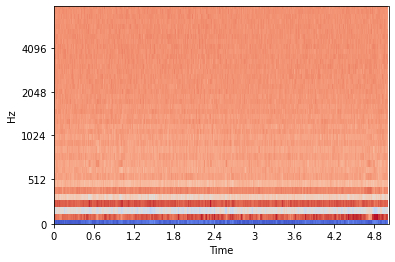

In [7]:
display.specshow(_sample_mfcc, sr=SAMPLE_RATE, hop_length=FRAME_STRIDE, x_axis='time', y_axis='mel')
plt.show()

In [3]:
[wav for wav in (constants.DATASET_DIR / 'raw' / 'Ngadas').iterdir() if wav.parts[-1][-3:].lower() == 'wav']

[PosixPath('../dataset/raw/Ngadas/Marsam.wav'),
 PosixPath('../dataset/raw/Ngadas/Mas_Tom_Ngadas_201102.wav')]

In [18]:
smth = [wav for wav in (constants.DATASET_DIR / 'raw' / 'Ngadas').iterdir()]

In [23]:
smth[0].parts[-1][-3:].lower() == 'wav'

True